# Artifical Intelligence Research Paper: Classification of King-Rook vs. King-Pawn

- Author: Zahaak Khan: khazahaa@sheridancollege.ca
- Student Number: 991625231
- Date: 11/25/2023
- Professor Ghassem Tofighi
- Sheridan College

In [ ]:
# install pycaret and dependencies
!pip install pycaret[full]

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.2.0'

In [ ]:
# Download the King-Rook vs. King-Pawn dataset zip file
!wget -q https://archive.ics.uci.edu/static/public/22/chess+king+rook+vs+king+pawn.zip

In [ ]:
# unzip the dataset
!unzip -o -q chess+king+rook+vs+king+pawn.zip

## Setup

In [ ]:
# View the dataset
import pandas as pd
df = pd.read_csv('kr-vs-kp.data')
df

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3191,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3192,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3193,t,f,t,f,f,f,t,f,f,f,...,f,t,f,f,t,f,f,f,n,nowin


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f       3195 non-null   object
 1   f.1     3195 non-null   object
 2   f.2     3195 non-null   object
 3   f.3     3195 non-null   object
 4   f.4     3195 non-null   object
 5   f.5     3195 non-null   object
 6   f.6     3195 non-null   object
 7   f.7     3195 non-null   object
 8   f.8     3195 non-null   object
 9   f.9     3195 non-null   object
 10  f.10    3195 non-null   object
 11  f.11    3195 non-null   object
 12  l       3195 non-null   object
 13  f.12    3195 non-null   object
 14  n       3195 non-null   object
 15  f.13    3195 non-null   object
 16  f.14    3195 non-null   object
 17  t       3195 non-null   object
 18  f.15    3195 non-null   object
 19  f.16    3195 non-null   object
 20  f.17    3195 non-null   object
 21  f.18    3195 non-null   object
 22  f.19    3195 non-null   

In [ ]:
# want to get more information on the feature names:
# DataFrame df has 37 columns (last one is target)
# Replace the first 36 columns with the provided list of strings
new_column_names = ['bkblk', 'bknwy', 'bkon8', 'bkona', 'bkspr', 'bkxbq', 'bkxcr', 'bkxwp',
                    'blxwp', 'bxqsq', 'cntxt', 'dsopp', 'dwipd', 'hdchk', 'katri', 'mulch',
                    'qxmsq', 'r2ar8', 'reskd', 'reskr', 'rimmx', 'rkxwp', 'rxmsq', 'simpl',
                    'skach', 'skewr', 'skrxp', 'spcop', 'stlmt', 'thrsk', 'wkcti', 'wkna8',
                    'wknck', 'wkovl', 'wkpos', 'wtoeg']

# Check if the number of new column names matches the existing number of columns in your DataFrame
if len(new_column_names) == len(df.columns[:36]):
    # Replace the first 36 columns with the new names
    df.columns = new_column_names + list(df.columns[36:])
else:
    print("Number of new column names doesn't match the existing number of columns.")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bkblk   3195 non-null   object
 1   bknwy   3195 non-null   object
 2   bkon8   3195 non-null   object
 3   bkona   3195 non-null   object
 4   bkspr   3195 non-null   object
 5   bkxbq   3195 non-null   object
 6   bkxcr   3195 non-null   object
 7   bkxwp   3195 non-null   object
 8   blxwp   3195 non-null   object
 9   bxqsq   3195 non-null   object
 10  cntxt   3195 non-null   object
 11  dsopp   3195 non-null   object
 12  dwipd   3195 non-null   object
 13  hdchk   3195 non-null   object
 14  katri   3195 non-null   object
 15  mulch   3195 non-null   object
 16  qxmsq   3195 non-null   object
 17  r2ar8   3195 non-null   object
 18  reskd   3195 non-null   object
 19  reskr   3195 non-null   object
 20  rimmx   3195 non-null   object
 21  rkxwp   3195 non-null   object
 22  rxmsq   3195 non-null   

In [ ]:
df

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,won
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3191,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3192,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3193,t,f,t,f,f,f,t,f,f,f,...,f,t,f,f,t,f,f,f,n,nowin


In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df, target = 'won', session_id = 123)

,Description,Value
0,Session id,123
1,Target,won
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3195, 37)"
5,Transformed data shape,"(3195, 39)"
6,Transformed train set shape,"(2236, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36


In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config('X_train_transformed')

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skrxp,spcop_f,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg
3039,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2188,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
51,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2805,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3171,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1865,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2609,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot: >

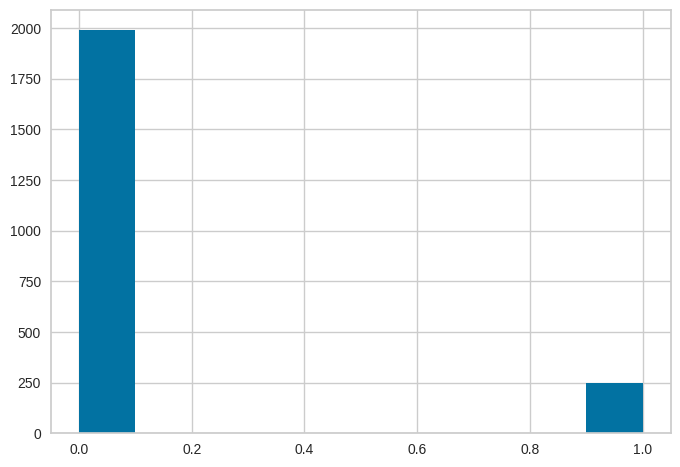

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['bkblk'].hist()

## Compare Models:

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9937,0.9993,0.9937,0.9938,0.9937,0.9874,0.9875,4.8660
dt,Decision Tree Classifier,0.9933,0.9932,0.9933,0.9933,0.9933,0.9866,0.9866,0.5080
xgboost,Extreme Gradient Boosting,0.9915,0.9996,0.9915,0.9915,0.9915,0.9830,0.9830,0.6280
lightgbm,Light Gradient Boosting Machine,0.9915,0.9997,0.9915,0.9915,0.9915,0.9830,0.9830,1.6770
rf,Random Forest Classifier,0.9852,0.9988,0.9852,0.9854,0.9852,0.9704,0.9706,1.1740
et,Extra Trees Classifier,0.9848,0.9983,0.9848,0.9850,0.9848,0.9695,0.9697,0.6010
gbc,Gradient Boosting Classifier,0.9808,0.9978,0.9808,0.9813,0.9808,0.9615,0.9620,1.0110
ada,Ada Boost Classifier,0.9660,0.9935,0.9660,0.9664,0.9660,0.9319,0.9322,0.5020
lr,Logistic Regression,0.9624,0.9933,0.9624,0.9629,0.9624,0.9247,0.9251,1.1290
svm,SVM - Linear Kernel,0.9606,0.0000,0.9606,0.9612,0.9606,0.9212,0.9217,0.3890


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Looks like the Catboost Classifier was the best model resulting in accuracy of 99.37%

## Analyze Models:

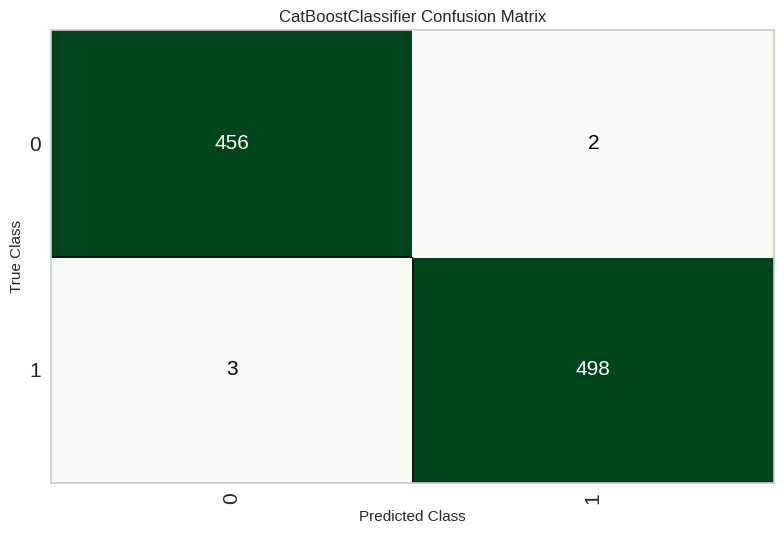

In [ ]:
# plot confusion matrix
plot_model(best, plot = "confusion_matrix")

456 + 2 + 3 + 498 = 959 == size of test set

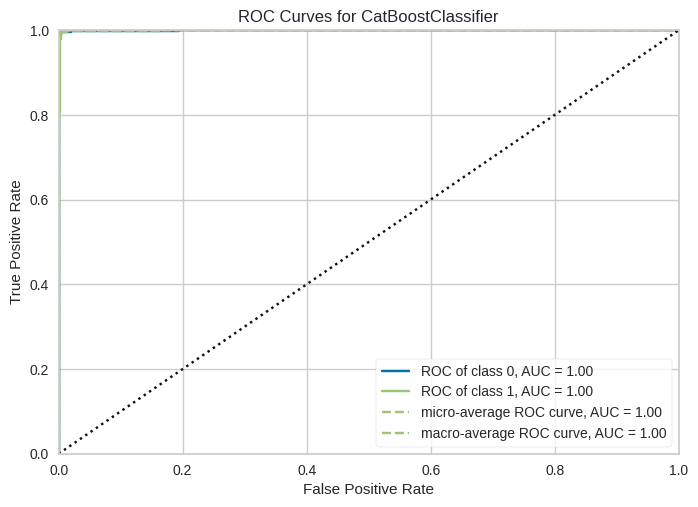

In [ ]:
# plot AUC
plot_model(best, plot = "auc")

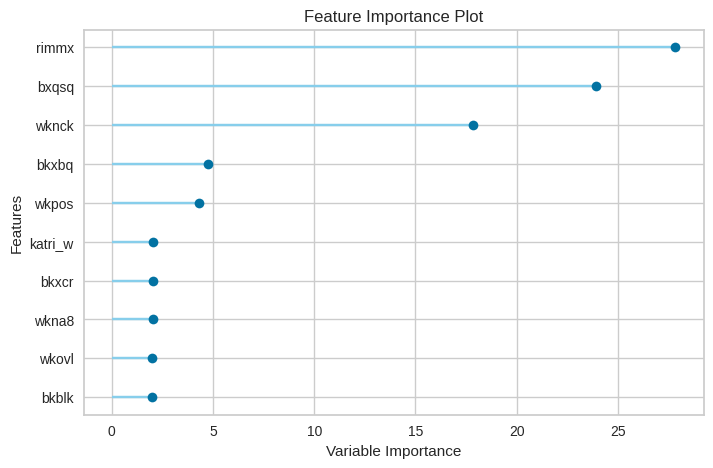

In [ ]:
# plot feature importance
plot_model(best, plot='feature')

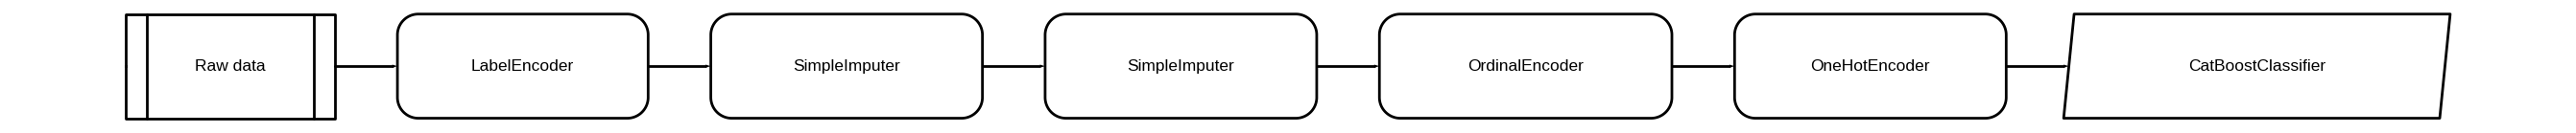

In [ ]:
# plot pipeleine
plot_model(best, plot='pipeline')

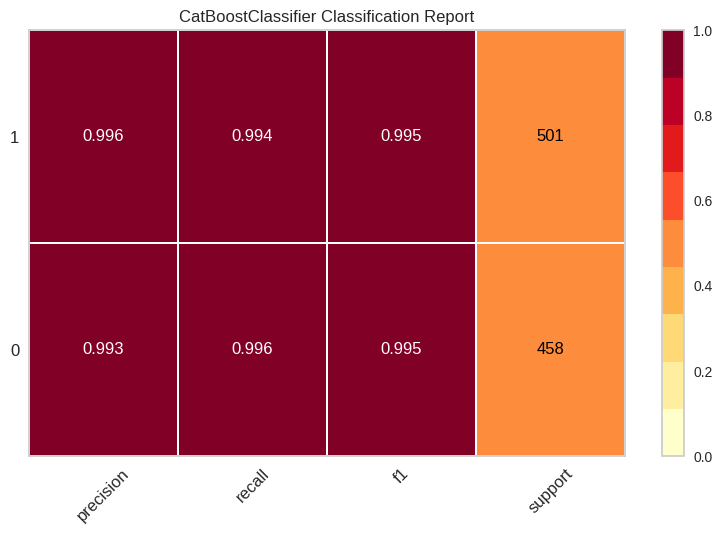

In [ ]:
# plot classification report
plot_model(best, plot='class_report')

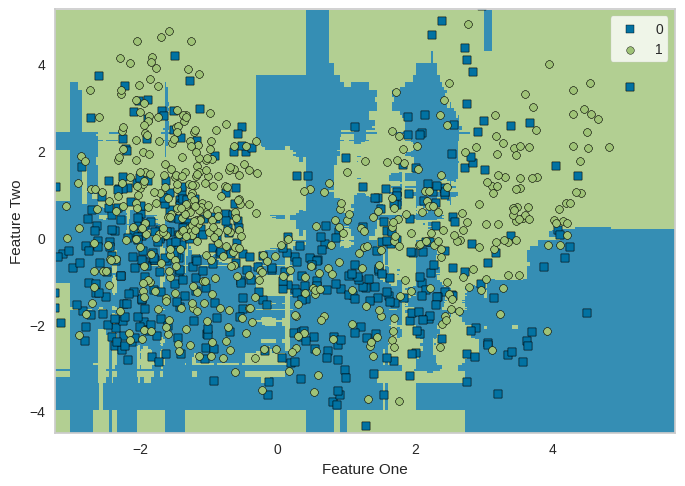

In [ ]:
# plot decision boundaries
plot_model(best, plot='boundary')

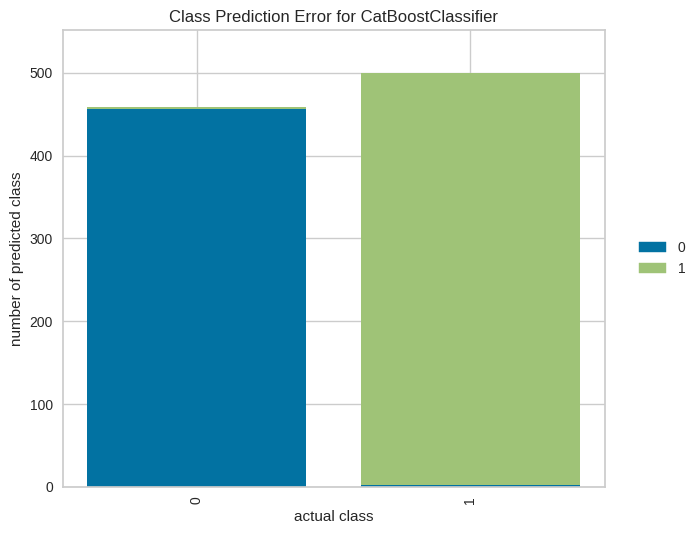

In [ ]:
# plot error
plot_model(best, plot='error')

## Prediction

predict_model function returns prediction_label and prediction_score (probability of the predicted class) as new columns in dataframe.

In [ ]:
# prediction on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9948,0.9995,0.9948,0.9948,0.9948,0.9896,0.9896


In [ ]:
# show predictions df
holdout_pred.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,won,prediction_label,prediction_score
183,t,f,f,f,t,t,t,f,t,f,...,f,f,f,f,t,t,n,won,won,0.9986
3123,f,f,f,t,t,t,f,f,t,f,...,t,f,f,t,f,t,t,nowin,nowin,0.9950
1877,f,f,f,f,f,t,t,f,f,f,...,f,f,f,f,t,f,n,won,won,0.9553
1440,f,f,f,f,f,t,f,f,f,t,...,f,f,f,f,t,t,n,nowin,nowin,0.9964
535,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,n,won,won,0.9662


## Save the Model

In [ ]:
# save pipeline
save_model(best, 'krvskp_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbo...
                                                                return_df=True,
                         

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('krvskp_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='...
                                                               return_df=True,
                                                               verbose=0))),
                ('onehot_encoding',
                 TransformerWrapper(exclude=None, include=['katri', 'spcop'],
                                    transformer=OneHotEncoder(cols=['katri',
                                                                    'spcop'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x7816d77e58a0>)],
         verbose=False)

## Interpreting Best Model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9911,0.9997,0.9911,0.9911,0.9911,0.9821,0.9821
1,0.9955,0.9994,0.9955,0.9956,0.9955,0.9911,0.9911
2,0.9911,0.9994,0.9911,0.9911,0.9911,0.9821,0.9821
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9911,0.9982,0.9911,0.9912,0.9911,0.9821,0.9823
6,0.9955,0.9991,0.9955,0.9956,0.9955,0.9910,0.9911
7,0.9955,1.0000,0.9955,0.9956,0.9955,0.9910,0.9911
8,0.9910,0.9978,0.9910,0.9910,0.9910,0.9820,0.9820


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

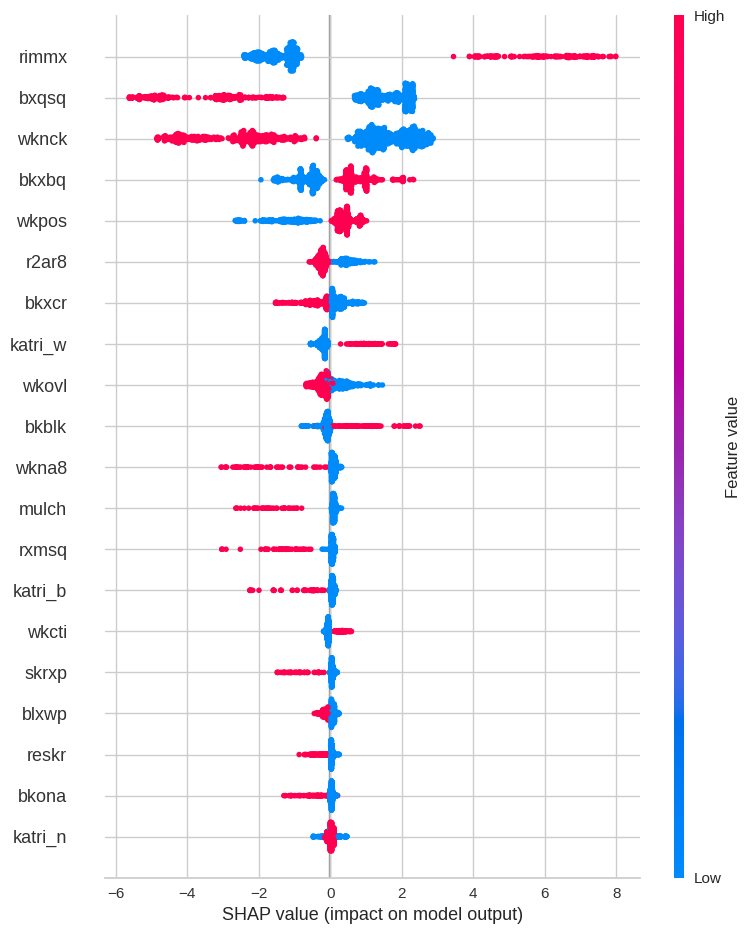

In [ ]:
catboost = create_model('catboost')
# interpret summary model
interpret_model(catboost, plot = 'summary')

In [ ]:
# reason plot for test set observation 1
interpret_model(catboost, plot = 'reason', observation = 1)

In [ ]:
automl()

In [ ]:
# dashboard function
dashboard(catboost, display_format ='inline')

Note: model_output=='probability'. For CatBoostClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


 99%|===================| 954/959 [01:10<00:00]       

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Finalize Model:

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbo...
                                                               verbose=0))),
                ('onehot_encoding',
                 TransformerWrapper(exclude=None, include=['katri', 'spcop'],
                                    transformer=OneHotEncoder(cols=['katri',
                                                                    'spcop'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x781626ad5de0>)],
         verbose=False)

**For the King Rook vs King Pawn dataset, it seems CatBoostClassifier resulted in the most accurate model, with an accuracy of 99.37% on the test set**